# Практическая работа по теме "Основы машинного обучения".

## Содержание:

* Шаг 1. Описание задачи, загрузка данных
* Шаг 2. Исследовательский анализ данных
* Шаг 3. Построение модели прогнозирования оттока клиентов
* Шаг 4. Кластеризация клиентов
* Шаг 5. Выводы и базовые рекомендации по работе с клиентами

## Шаг 1. Описание задачи, загрузка данных
   
Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.
Распространённая проблема фитнес-клубов и других сервисов — отток клиентов.Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество клиентских анкет. 
    
Задача — провести анализ и подготовить план действий по удержанию клиентов, в том числе:
* научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
* сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
* проанализировать основные признаки, наиболее сильно влияющие на отток;
* сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
1) выделить целевые группы клиентов;
2) предложить меры по снижению оттока;
3) определить другие особенности взаимодействия с клиентами.     

Описание файла gym_churn.csv:
Данные клиента за предыдущий до проверки факта оттока месяц:
* 'gender' — пол;
* 'Near_Location' — проживание или работа в районе, где находится фитнес-центр;
* 'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
* Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
* 'Phone' — наличие контактного телефона;
* 'Age' — возраст;
* 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).

Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:
* 'Contract_period' — длительность текущего действующего абонемента (месяц, 6 месяцев, год);
* 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);
* 'Group_visits' — факт посещения групповых занятий;
* 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;
* 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;
* 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон.
* 'Churn' — факт оттока в текущем месяце.

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#from sklearn.linear_model import Lasso, Ridge
#from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier, GradientBoostingClassifier
import matplotlib.pyplot as plt
#from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import KMeans
import itertools

In [2]:
# прочитаем из csv-файла данные, распечатаем его размер и первые 5 строк
df = pd.read_csv('https://code.s3.yandex.net/datasets/gym_churn.csv')
df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


Промежуточный вывод: данные успешно прочитаны

## Шаг 2. Исследовательский анализ данных

In [3]:
df.info()                                                            # Выведем общую информацию
print('    Дубликатов, шт:',df.duplicated().sum())                   # Выведем кол-во дубликатов
#print('    Дубликатов по столбцу id, шт:',df['id'].duplicated().sum()) # Выведем кол-во дубликатов
print('    Пропусков по столбцам:')
display(df.isna().sum())                                             # подсчёт пропусков
print('    Вывод статистической информации:')
round(df.describe().T,2)                                             # Выведем на экран статистическую информацию

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

    Вывод статистической информации:


,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.51,0.50,0.00,0.00,1.00,1.00,1.00
Near_Location,4000.0,0.85,0.36,0.00,1.00,1.00,1.00,1.00
Partner,4000.0,0.49,0.50,0.00,0.00,0.00,1.00,1.00
Promo_friends,4000.0,0.31,0.46,0.00,0.00,0.00,1.00,1.00
Phone,4000.0,0.90,0.30,0.00,1.00,1.00,1.00,1.00
Contract_period,4000.0,4.68,4.55,1.00,1.00,1.00,6.00,12.00
Group_visits,4000.0,0.41,0.49,0.00,0.00,0.00,1.00,1.00
Age,4000.0,29.18,3.26,18.00,27.00,29.00,31.00,41.00
Avg_additional_charges_total,4000.0,146.94,96.36,0.15,68.87,136.22,210.95,552.59
Month_to_end_contract,4000.0,4.32,4.19,1.00,1.00,1.00,6.00,12.00


Промежуточный вывод: по данным отображенной информации, необходимо название столбцов привести к змеимному регистру, и несколько сократить из-за слишком длинного наименования. Пропусков нет вовсе, удалять строки не требутся

In [4]:
df.columns = df.columns.str.lower()
print('Промежуточный вывод:',df.columns)

Промежуточный вывод: Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month',
       'churn'],
      dtype='object')


In [5]:
df = df.rename(columns={  
    'near_location':'location',
    'promo_friends':'promo',
    'avg_additional_charges_total':'other_services',
    'month_to_end_contract':'m_to_end',
    'avg_class_frequency_total':'frequency_total',
    'avg_class_frequency_current_month':'frequency_m',
    'ExpId':'group',})
print('Итого:',df.columns)

Итого: Index(['gender', 'location', 'partner', 'promo', 'phone', 'contract_period',
       'group_visits', 'age', 'other_services', 'm_to_end', 'lifetime',
       'frequency_total', 'frequency_m', 'churn'],
      dtype='object')


### Итоговые датафреймы для работы
Для дальнейшего удобства ещё раз выведем на экран пять первых строк датафрейма и описание его столбцов:
* 'gender' — пол;
* 'location' — проживание или работа в районе, где находится фитнес-центр;
* 'partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
* promo — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
* 'phone' — наличие контактного телефона;
* 'age' — возраст;
* 'lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).

Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:
* 'contract_period' — длительность текущего действующего абонемента (месяц, 6 месяцев, год);
* 'm_to_end' — срок до окончания текущего действующего абонемента (в месяцах);
* 'group_visits' — факт посещения групповых занятий;
* 'frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;
* 'frequency_m' — средняя частота посещений в неделю за предыдущий месяц;
* 'other_services' — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон.
* 'churn' — факт оттока в текущем месяце.

In [6]:
df.head()

,gender,location,partner,promo,phone,contract_period,group_visits,age,other_services,m_to_end,lifetime,frequency_total,frequency_m,churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


Отобразим средние значения признаков в двух группах при помощи метода groupby():

In [7]:
df.groupby('churn').agg({'mean'})

,gender,location,partner,promo,phone,contract_period,group_visits,age,other_services,m_to_end,lifetime,frequency_total,frequency_m
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


Промежуточный вывод: ярко выраженное отличие между клиентами, ушедшими в отток и оставшимися, прослеживается по столбцу contract_period, значительное отличие по столбцу promo, m_to_end, lifetime, frequency_total, frequency_m,  менее ярко выраженное по столбцам partner, group_visits, other_services.

In [8]:
df.describe()

,gender,location,partner,promo,phone,contract_period,group_visits,age,other_services,m_to_end,lifetime,frequency_total,frequency_m,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Построим столбчатые гистограммы для тех, кто ушел в отток и остался:

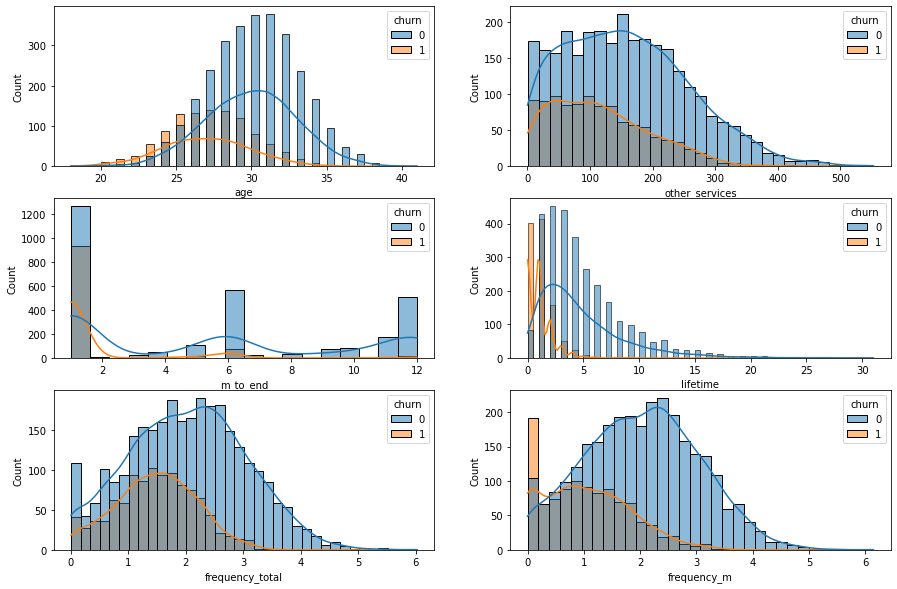

In [11]:
fig, ax = plt.subplots(nrows = 3, ncols=2, figsize=(15, 10))
# вытягиваем
ax = ax.flatten()
list_number = ['age', 'other_services', 'm_to_end', 'lifetime', 'frequency_total', 'frequency_m']
for i in range(len(list_number)):
    sns.histplot(data = df, x = df[list_number[i]], hue='churn', ax=ax[i], kde = True)
plt.show() 

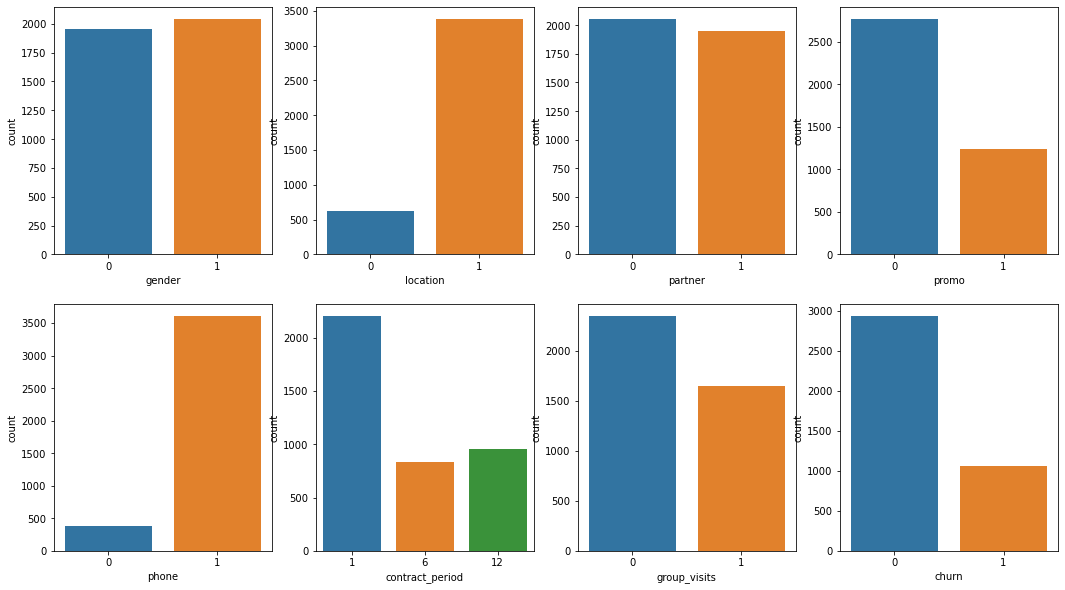

In [10]:
list_category = ['gender', 'location', 'partner', 'promo', 'phone', 'contract_period', 'group_visits', 'churn']
plt.figure(figsize = (18,10))
for i in range(len(list_category)):
    plt.subplot(2, 4, i+1)
    sns.countplot(x=df[list_category[i]])
plt.show()

Промежуточный вывод (добавлено): наблюдается несбалансированность классов по целевому признаку 'churn': количество клиентов, ушедших в отток примерно в три раза меньше оставшихся клиентов.

Промежуточный вывод: кроме подтверждения предыдущих наблюдений по более и менее выраженным отличием, гистограммы свидетельствуют, что в отток ушли в большинстве случаев именно новые пользователи (с liftaim'ом до 2 месяцев), составлявшие основу пользователей с возрастом от 25 до 34 лет. По той причине, что это новые пользователи, у них наблюдается малый срок проплаты (очевидно, что новые клиенты проявят осторожность и не будут сразу оплачивать обонемент на год вперед), малая активность по пользованию второстепенных услуг фитнес-центра.
Представляется, что проблема фитнес-центра именно в низкой удовлетворенности новых пользователей в предоставляемых услугах и необходимо обратить внимание на удержание новых пользователей.

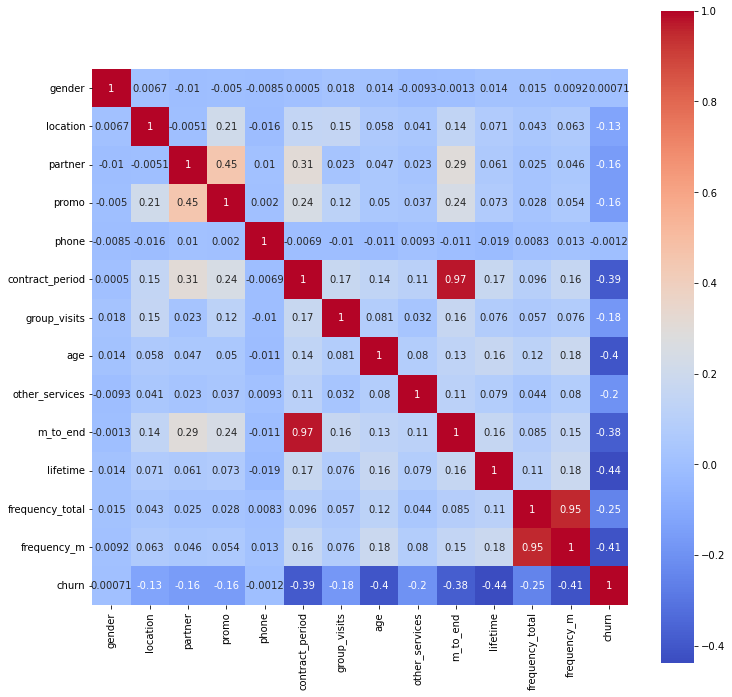

In [12]:
# корреляционная матрица
corr_df = df.corr()# напишите ваш код здесь

# нарисуем heatmap
plt.figure(figsize = (12,12))
sns.heatmap(corr_df, square = True, annot = True,cmap='coolwarm' )
plt.show()

Промежуточный вывод: 
По данным матрицы корреляции Пирсона можно отметить:
* очень высокую корреляционную (линейную) связь между парами признаков 'm_to_end':'contract_period' и 'frequency_m':'frequency_total';
* отсутствие корреляционной (линейной) связи такими признаков, как 'phone' и 'gender' со всеми остальными признаками;
* между другими признаками корреляционная (линейная) фиксируется слабая и редко - средняя , в том числе:
* признак 'churn' имеет относительно слабую корреляционную (линейную) связь с такими признаками, как 'contract_period', 'age', 'm_to_end', 'lifetime', 'frequency_total', и очень слабую с такими признаками, как 'location', 'partner', 'promo'.
* наличие мультиколлинеарности между признаками contract_period и m_to_end, один из них нужно исключить из расчета при построении модели, например m_to_end.


Промежуточный вывод по шагу:
Прослеживается ярко выраженное отличие между клиентами, ушедшими в отток и оставшимися по столбцу contract_period, значительное отличие по столбцу promo, m_to_end, lifetime, frequency_total, frequency_m, менее ярко выраженное по столбцам partner, group_visits, other_services.

Наблюдается несбалансированность классов по целевому признаку 'churn': количество клиентов, ушедших в отток примерно в три раза меньше оставшихся клиентов.

По гистограммам можно увидеть, что в отток ушли в большинстве случаев именно новые пользователи (с liftaim'ом до 2 месяцев), составлявшие основу пользователей с возрастом от 25 до 34 лет. По той причине, что это новые пользователи, у них наблюдается малый срок проплаты (очевидно, что новые клиенты проявят осторожность и не будут сразу оплачивать обонемент на год вперед), малая активность по пользованию второстепенных услуг фитнес-центра. 

Представляется, что проблема фитнес-центра именно в низкой удовлетворенности новых пользователей в предоставляемых услугах и необходимо обратить внимание на удержание новых пользователей.

По данным матрицы корреляции Пирсона можно отметить: очень высокую корреляционную (линейную) связь между парами признаков 'm_to_end':'contract_period' и 'frequency_m':'frequency_total', отсутствие корреляционной (линейной) связи такими признаков, как 'phone' и 'gender' со всеми остальными признаками, между другими признаками корреляционная (линейная) фиксируется слабая и редко - средняя , в том числе: признак 'churn' имеет относительно слабую корреляционную (линейную) связь с такими признаками, как 'contract_period', 'age', 'm_to_end', 'lifetime', 'frequency_total', и очень слабую с такими признаками, как 'location', 'partner', 'promo'.
Прослеживается наличие мультиколлинеарности между признаками contract_period и m_to_end, один из них нужно исключить из расчета при построении модели, например m_to_end.



## Шаг 3 Построение модели прогнозирования оттока клиентов

Преобразовывать текстовые (категориальные) данные при помощи метода get_dummies не нужно в связи с отсутствием таковых данных.

Разобьем данные на обучающую и валидационную выборки:

In [13]:
# разделим наши данные на признаки (матрица X) и целевую переменную (y)
X = df.drop(columns=['m_to_end']).drop('churn', axis=1)
y = df.drop(columns=['m_to_end'])['churn']
# разделяем модель на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0, stratify=y)

Стандартизируем данные:

In [15]:
# создадим объект класса StandardScaler и применим его к обучающей выборке
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)  # обучаем scaler и одновременно трансформируем матрицу для обучающей выборки

# применяем стандартизацию к матрице признаков для тестовой выборки
#X_train_st = scaler.transform(X_train)    # Это лишнее
X_test_st = scaler.transform(X_test)

Определим функцию, которая будет выводить необходимые метрики:

In [16]:
def print_all_metrics(y_true, y_pred, y_proba, title='Метрики классификации'):
    print(title)
    print('\tAccuracy (Доля правильных ответов): {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision (Точность): {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall (Полнота): {:.2f}'.format(recall_score(y_true, y_pred)))

Зададим модели логической регрессии и случайного леса, сделаем прогноз и выведем метрики:

In [17]:
# зададим алгоритм для модели логистической регрессии
lr_model = LogisticRegression(solver='liblinear', random_state=0)

# обучим модель
lr_model.fit(X_train_st, y_train)

# воспользуемся уже обученной моделью, чтобы сделать прогнозы
lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)[:, 1]

# выведем все метрики
print_all_metrics(
    y_test,
    lr_predictions,
    lr_probabilities,
    title='Метрики для модели логистической регрессии по валидационной выборке:')

# зададим алгоритм для новой модели на основе алгоритма случайного леса
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0) 

# обучим модель случайного леса
rf_model.fit(X_train_st, y_train)

# воспользуемся уже обученной моделью, чтобы сделать прогнозы
rf_predictions = rf_model.predict(X_test_st)
rf_probabilities = rf_model.predict_proba(X_test_st)[:, 1]

# выведем все метрики
print_all_metrics(
    y_test,
    rf_predictions,
    rf_probabilities,
    title='Метрики для модели случайного леса по валидационной выборке:')

Метрики для модели логистической регрессии по валидационной выборке:
	Accuracy (Доля правильных ответов): 0.94
	Precision (Точность): 0.90
	Recall (Полнота): 0.85
Метрики для модели случайного леса по валидационной выборке:
	Accuracy (Доля правильных ответов): 0.92
	Precision (Точность): 0.87
	Recall (Полнота): 0.80


In [18]:
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
lr_predictions__ = lr_model.predict(X_train_st)

# выведем все метрики
print_all_metrics(
    y_train,
    lr_predictions__,
    lr_probabilities,
    title='Метрики для модели логистической регрессии по обучающей выборке:')

# воспользуемся уже обученной моделью, чтобы сделать прогнозы
rf_predictions__ = rf_model.predict(X_train_st)

# выведем все метрики
print_all_metrics(
    y_train,
    rf_predictions__,
    rf_probabilities,
    title='Метрики для модели случайного леса по обучающей выборке:')

Метрики для модели логистической регрессии по обучающей выборке:
	Accuracy (Доля правильных ответов): 0.93
	Precision (Точность): 0.88
	Recall (Полнота): 0.84
Метрики для модели случайного леса по обучающей выборке:
	Accuracy (Доля правильных ответов): 1.00
	Precision (Точность): 1.00
	Recall (Полнота): 1.00


Попробуем подобрать гиперпараметр n_estimators для улучшения работы алгоритма RandomForestClassifier:

In [19]:
for i in [100,150,200,250,300,350,400,450,500]:
    # зададим алгоритм для новой модели на основе алгоритма случайного леса
    rf_model_ = RandomForestClassifier(n_estimators = i, random_state = 0) 
    # обучим модель случайного леса
    rf_model_.fit(X_train_st, y_train)
    # воспользуемся уже обученной моделью, чтобы сделать прогнозы
    rf_predictions_ = rf_model_.predict(X_test_st)
    rf_probabilities_ = rf_model_.predict_proba(X_test_st)[:, 1]
    # выведем все метрики
    #print(i,':Acc ',accuracy_score(y_test, rf_predictions_), 'Prec.',precision_score(y_test, rf_predictions_),'Rec.',recall_score(y_test, rf_predictions_))
    print('n_estimators:{:.0f} Acc:{:.4f} Prec.:{:.4f} Rec.:{:.4f}'.format(i, accuracy_score(y_test, rf_predictions_), precision_score(y_test, rf_predictions_),recall_score(y_test, rf_predictions_)))


n_estimators:100 Acc:0.9163 Prec.:0.8718 Rec.:0.8019
n_estimators:150 Acc:0.9187 Prec.:0.8769 Rec.:0.8066
n_estimators:200 Acc:0.9213 Prec.:0.8782 Rec.:0.8160
n_estimators:250 Acc:0.9263 Prec.:0.8883 Rec.:0.8255
n_estimators:300 Acc:0.9275 Prec.:0.8929 Rec.:0.8255
n_estimators:350 Acc:0.9263 Prec.:0.8883 Rec.:0.8255
n_estimators:400 Acc:0.9250 Prec.:0.8838 Rec.:0.8255
n_estimators:450 Acc:0.9250 Prec.:0.8838 Rec.:0.8255
n_estimators:500 Acc:0.9275 Prec.:0.8929 Rec.:0.8255


Промежуточный вывод: не смотря на подбор параметра n_estimators, алгоритм RandomForestClassifier в данном случае уступает алгоритму LogisticRegression.

Выведем на экран важность признаков:

In [21]:
fi_df = pd.DataFrame(data={'feature': X.columns, 'importance': abs(lr_model.coef_ [0])}).sort_values(
    'importance',ascending=False).reset_index(drop=True)
display(fi_df.head())

,feature,importance
0,frequency_m,4.180872
1,lifetime,3.465316
2,frequency_total,3.104129
3,contract_period,1.290540
4,age,1.143002


Промежуточный вывод по шагу: В данном шаге исходные данные были разделены на обучающую и валидационную выборки, обе выборки стандартизированы, заданы алгоритмы LogisticRegression и RandomForestClassifier, отображены метрики по обоим моделям. Лучший результат показала модель LogisticRegression, несмотря на подбор параметра n_estimators в моделе RandomForestClassifier.

## Шаг 4. Кластеризация клиентов

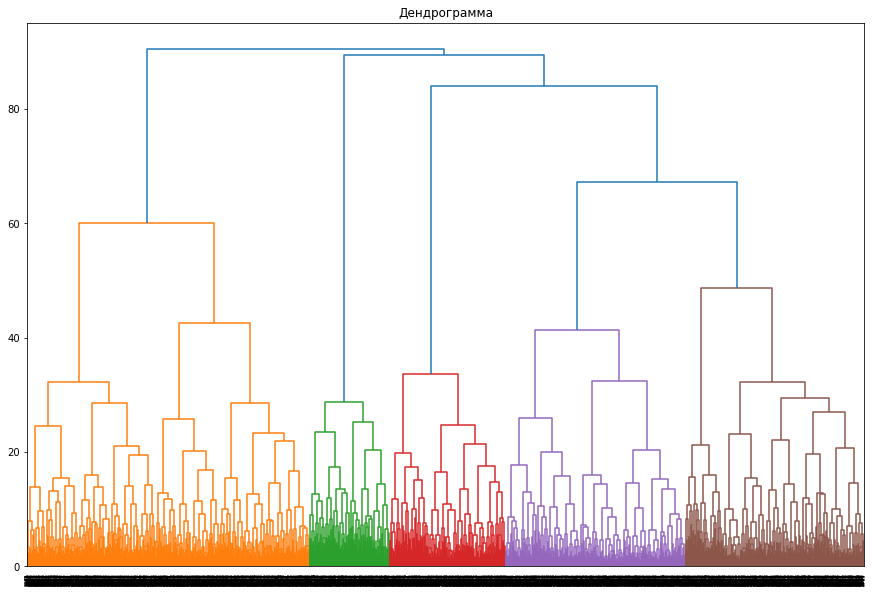

In [22]:
# обязательная стандартизация данных перед работой с алгоритмами
sc = StandardScaler()
X_sc = sc.fit_transform(df.drop(columns=['churn','m_to_end']))   
x_sc = sc.fit_transform(df.drop(columns=['churn','m_to_end']))

# в переменной linked сохраняем таблицу «связок» между объектами
linked = linkage(X_sc, method = 'ward') 

# Визуализируем дендрограмму: 
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Дендрограмма')
plt.show()

Промежуточный вывод: судя по дендрограмме, кластеризацию можно выполнить на 2, 5, 6, 11, 22 и более кластеров. Для более удобного анализа целесообразно количество кластеров принять равным 5. 

In [23]:
# задаём модель k_means с числом кластеров 5 и фиксируем значение random_state
km = KMeans(n_clusters=5, random_state=0)

# прогнозируем кластеры для наблюдений 
labels = km.fit_predict(X_sc)

# сохраняем метки кластера в поле нашего датасета
df['cluster'] = labels

# выводим статистику по средним значениям наших признаков по кластеру
#display(df.groupby('cluster').agg('mean'))   #                                 так было
groupby_cluster = df.groupby('cluster').agg('mean')
cluster_count = df.groupby('cluster').agg({'partner':'count'})
# .... и количество строк в нем
groupby_cluster['count'] = cluster_count['partner']
display(groupby_cluster)

df.describe()[1:2]

,gender,location,partner,promo,phone,contract_period,group_visits,age,other_services,m_to_end,lifetime,frequency_total,frequency_m,churn,count
cluster,,,,,,,,,,,,,,,
0,0.478392,0.993970,0.947739,0.879397,1.000000,7.831156,0.536683,29.629146,154.788356,7.103518,4.447236,1.836547,1.795608,0.102513,995
1,0.524675,0.862338,0.472727,0.306494,0.000000,4.758442,0.425974,29.283117,144.240418,4.457143,3.922078,1.846575,1.716160,0.267532,385
2,0.494515,1.000000,0.240506,0.095359,1.000000,2.483544,0.331646,28.216034,131.341969,2.376371,2.440506,1.255953,1.030234,0.502110,1185
3,0.568736,0.970067,0.307095,0.097561,0.998891,5.137472,0.483370,30.288248,166.180576,4.727273,5.011086,2.879208,2.882946,0.041020,902
4,0.495310,0.000000,0.487805,0.075047,1.000000,2.859287,0.228893,28.566604,136.384285,2.677298,2.911820,1.674358,1.500208,0.420263,533


,gender,location,partner,promo,phone,contract_period,group_visits,age,other_services,m_to_end,lifetime,frequency_total,frequency_m,churn,cluster
mean,0.51025,0.84525,0.48675,0.3085,0.9035,4.68125,0.41225,29.18425,146.943728,4.32275,3.72475,1.87902,1.767052,0.26525,1.89825


Визуализируем таблицу:

In [25]:
cluster_features.T.style.background_gradient(cmap='coolwarm', axis=1).set_precision(2)

C:\Users\Павел\AppData\Local\Temp\ipykernel_9648\793093793.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  cluster_features.T.style.background_gradient(cmap='coolwarm', axis=1).set_precision(2)


,0,1,2,3,4
cluster,0.00,1.00,2.00,3.00,4.00
gender,0.48,0.52,0.49,0.57,0.50
location,0.99,0.86,1.00,0.97,0.00
partner,0.95,0.47,0.24,0.31,0.49
promo,0.88,0.31,0.10,0.10,0.08
phone,1.00,0.00,1.00,1.00,1.00
contract_period,7.83,4.76,2.48,5.14,2.86
group_visits,0.54,0.43,0.33,0.48,0.23
age,29.63,29.28,28.22,30.29,28.57
other_services,154.79,144.24,131.34,166.18,136.38


По данным проведенной кластеризации составим портрет посетилей различных кластеров:

Кластер №0 - "участники промо-акций". Этот кластер составляют участники промо-акций и партнерских программ, самые активные участники групповых мероприятий, в ней и наибольший срок проплаченного абонемента, риск оттока один из самых низких.

Кластер №1 - "анонимы". Самые обычные среднестастические пользователи, отличившиеся только тем, что не оставили своего номера телефона.

Кластер №2 - "новички". Кластер представлен самыми молодыми, самые неактивными пользователями фитнес-центра и сопутствующих услуг, с наименьшими абонементами, максимальный риск ухода в отток.

Кластер №3 - "опытные красавчики". Этот кластер составляют наиболее частыми посетителями фитнес-центра с наибольшим "стажем", это наиболее активные потребители сопутствующих услуг, риск оттока наименьший.

Кластер №4 - "гости района". Этот кластер составляют посетители, не работающие и не проживающие вблизи фитнес-центра, самые редкие участники промо-акций и групповых занятий, риск оттока сравнительно высокий.

Промежуточный вывод: клиенты категории №2 "новички" наиболее склонны к оттоку, клиенты категории №4 "гости района" - имеют среднюю склонность к оттоку, а наиболее надежные клиенты - клиенты категории №0 "участники промо-акций" и №3 "опытные красавчики".

# Шаг 5. Выводы

Результаты исследовательского анализа данных:
* Прослеживается ярко выраженное отличие между клиентами, ушедшими в отток и оставшимися по столбцу contract_period, значительное отличие по столбцу promo, m_to_end, lifetime, frequency_total, frequency_m, менее ярко выраженное по столбцам partner, group_visits, other_services.
* Наблюдается несбалансированность классов по целевому признаку 'churn': количество клиентов, ушедших в отток примерно в три раза меньше оставшихся клиентов.
* По графикам можно увидеть, что в отток ушли в большинстве случаев именно новые пользователи (с liftaim'ом до 2 месяцев), составлявшие основу пользователей с возрастом от 25 до 34 лет. По той причине, что это новые пользователи, у них наблюдается малый срок проплаты (очевидно, что новые клиенты проявят осторожность и не будут сразу оплачивать обонемент на год вперед), малая активность по пользованию второстепенных услуг фитнес-центра.
* В связи с обнаружением мультиколлинеарности между признаками contract_period и m_to_end, признак m_to_end исключен из расчета при построении модели.

Результаты построения модели прогнозирования оттока клиентов:
* Исходные данные были разделены на обучающую и валидационную выборки, обе выборки стандартизированы, заданы алгоритмы LogisticRegression и RandomForestClassifier, отображены метрики по обоим моделям. 
* Лучший результат показала модель LogisticRegression, несмотря на подбор параметра n_estimators в алгоритме RandomForestClassifier.

По данным проведенной кластеризации выделяются две категории, наиболее склонные к оттоку:
* Кластер №2 - "новички". Кластер представлен самыми молодыми (стаж менее 3 мес.), самые неактивными пользователями фитнес-центра (менее 1,5 раз в неделю) и сопутствующих услуг, с наименьшими абонементами (3 месяца и менее), риск ухода в отток максимальный.
* Кластер №4 - "гости района". Этот кластер составляют посетители, не работающие и не проживающие вблизи фитнес-центра, самые редкие участники промо-акций и групповых занятий, риск оттока сравнительно высокий.

Общие выводы:
* В ходе выполнения работы сформирован портрет уходящего в отток клиента: новичок (стаж посещений до 2 месяцев), оплатил абонемент всего на 1 месяц, не проходил регистрацию по промо-коду, за последний месяц посещал зал не более 2 раз, возраст 25-34 года, активность в групповых занятиях ниже среднего. Высокий риск неокупаемости привлечения новых клиентов.
* Представляется, что существует проблема фитнес-центра именно в низкой удовлетворенности новых пользователей в предоставляемых услугах, для решения вопроса необходимо разработать стратегию, направленную на удержание в первую очередь новых пользователей (акции, скидки для новых клиентов, реклама групповых занятий для увеличения общения между посетителями фитнес-центра).
* Целевая аудитория для проведения таких акций - прежде всего, посетители кластера №2.